# Análisis de Años de Cobertura

**Pregunta de Investigación MQ8:** ¿Qué períodos de tiempo cubren los estudios incluidos en la revisión?

Este notebook analiza los períodos de tiempo cubiertos por los estudios incluidos en la revisión sistemática.

In [1]:
# Configuración del entorno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configurar estilo de gráficos
plt.style.use('default')
sns.set_palette("husl")

In [2]:
# Cargar el dataset desde GitHub
url = "https://raw.githubusercontent.com/mlproyecto/doctorado/main/MappingReview.csv"
df = pd.read_csv(url, sep=';', encoding='latin-1')

# Limpiar los nombres de las columnas para eliminar espacios en blanco
df.columns = df.columns.str.strip()

print(f"Dataset cargado: {df.shape[0]} filas y {df.shape[1]} columnas")

print(f"Columnas disponibles: {df.columns.tolist()}")

Dataset cargado: 89 filas y 8 columnas
Columnas disponibles: ['Title', 'Author(s)', 'Year', 'Publication Title', 'Type of Publication', 'Source', 'DOI', 'Abstract']


Columnas de años encontradas: ['Year']
Rango de años: 2020 - 2025
Año promedio: 2023.3
Año mediano: 2024


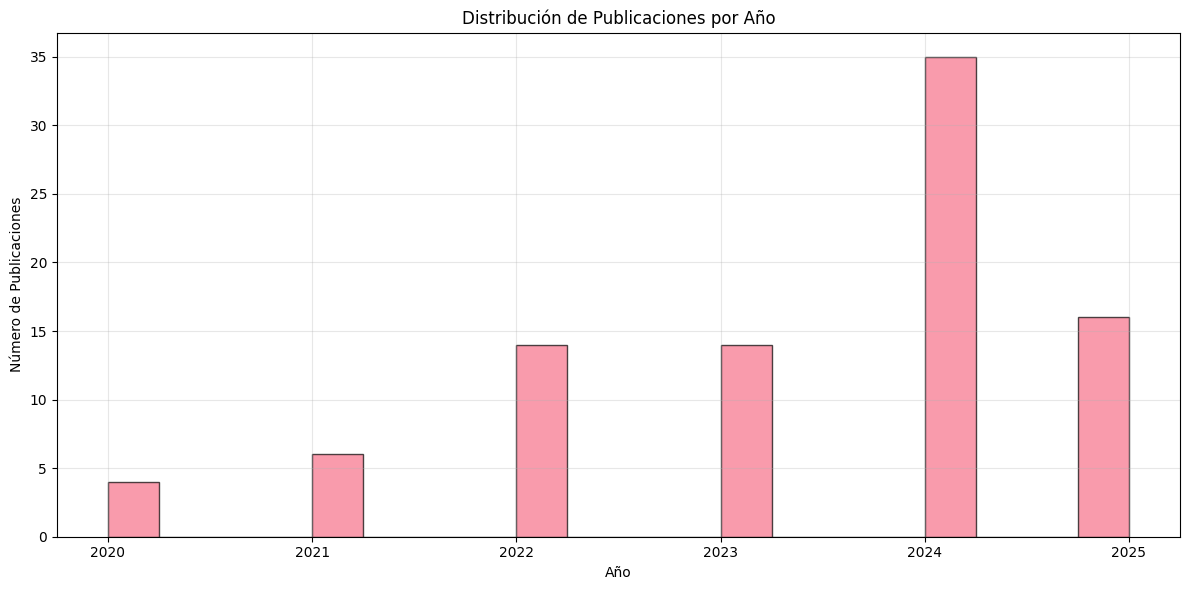

In [3]:
# Análisis básico de años
year_columns = [col for col in df.columns if 'year' in col.lower() or 'año' in col.lower()]
print(f"Columnas de años encontradas: {year_columns}")

# Analizar años de publicación
if 'Year' in df.columns:
    years = df['Year'].dropna()
    print(f"Rango de años: {int(years.min())} - {int(years.max())}")
    print(f"Año promedio: {years.mean():.1f}")
    print(f"Año mediano: {int(years.median())}")
    
    # Distribución de años
    plt.figure(figsize=(12, 6))
    plt.hist(years, bins=20, edgecolor='black', alpha=0.7)
    plt.xlabel('Año')
    plt.ylabel('Número de Publicaciones')
    plt.title('Distribución de Publicaciones por Año')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

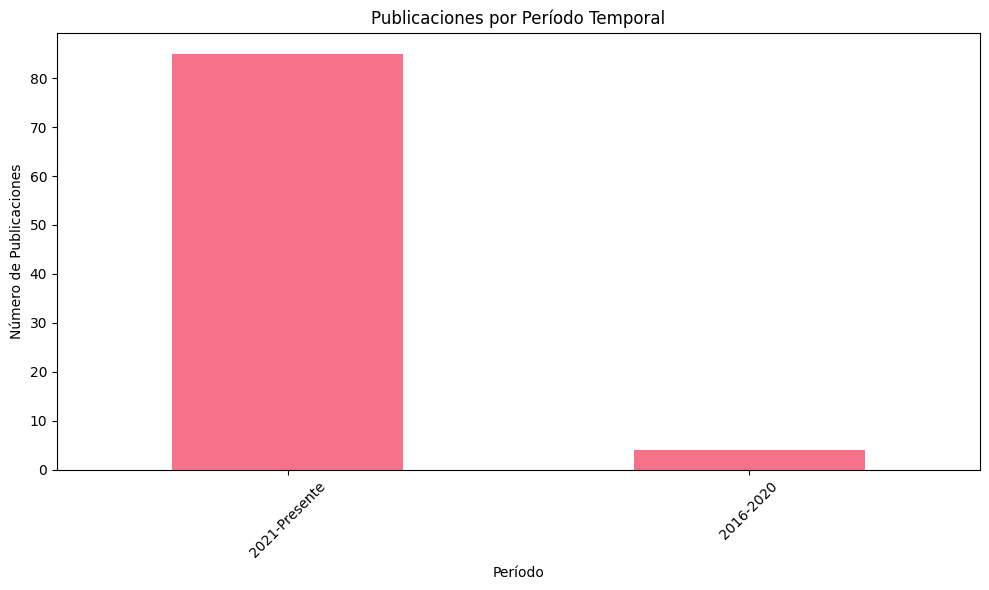

In [4]:
# Análisis de períodos
if 'Year' in df.columns:
    # Definir períodos
    def categorize_period(year):
        if year < 2010:
            return 'Antes de 2010'
        elif 2010 <= year <= 2015:
            return '2010-2015'
        elif 2016 <= year <= 2020:
            return '2016-2020'
        else:
            return '2021-Presente'
    
    df['period'] = df['Year'].apply(categorize_period)
    
    # Contar publicaciones por período
    period_counts = df['period'].value_counts()
    
    plt.figure(figsize=(10, 6))
    period_counts.plot(kind='bar')
    plt.xlabel('Período')
    plt.ylabel('Número de Publicaciones')
    plt.title('Publicaciones por Período Temporal')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()